In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import minimum_filter



Enter a image file name :: sunflower.jpg
Enter kernel size :: 15


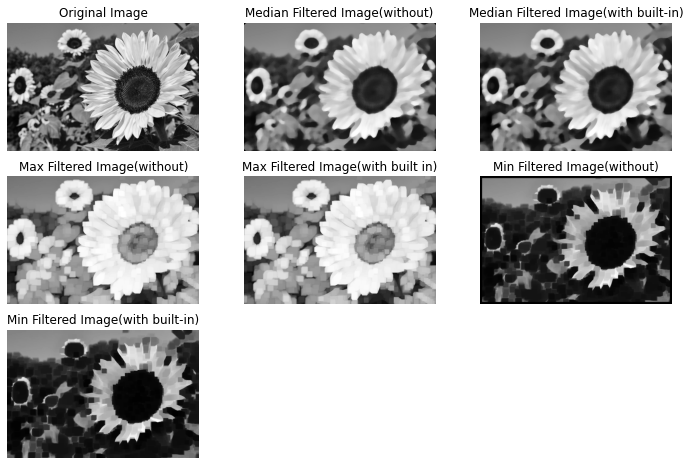

In [5]:
#median,min,max filter on single code
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import maximum_filter
from scipy.ndimage import minimum_filter

def find_median(arr):
    n = len(arr)
    arr.sort()
    if n % 2 == 0:
        median = (arr[n // 2 - 1] + arr[n // 2]) / 2
    else:
        median = arr[n // 2]
    return median

def median_filter_custom(img, kernel_size):
    rows, cols = img.shape
    pad_size = kernel_size // 2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_median(neighbours)
    
    return modified_image

def find_max(arr):
    n=len(arr)
    maxval=arr[0]
    for val in arr:
        if val>maxval:
            maxval=val
    return maxval

def max_filter_custom(img,kernel_size):
    rows,cols=img.shape
    pad_size=kernel_size//2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_max(neighbours)
    
    return modified_image

def find_min(arr):
    n=len(arr)
    minval=arr[0]
    for val in arr:
        if val<minval:
            minval=val
    return minval

def min_filter_custom(img,kernel_size):
    rows,cols=img.shape
    pad_size=kernel_size//2
    padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
    modified_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            neighbours = []
            for p in range(-pad_size, pad_size + 1):
                for q in range(-pad_size, pad_size + 1):
                    neighbours.append(padded_img[i + pad_size + p, j + pad_size + q])
                    
            modified_image[i, j] = find_min(neighbours)
    
    return modified_image

root_directory='C:\\Users\\User\\ImageProcessing\\ImageProcessing'
filename = input("Enter a image file name :: ")
filepath = os.path.join(root_directory, filename)
img = cv2.imread(filepath)
if img is None:
    print("Unable to load file::")
else:
    gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kernel_size = int(input("Enter kernel size :: "))
    filtered_image1 = median_filter_custom(gray_image, kernel_size)
    filtered_image2=cv2.medianBlur(gray_image, kernel_size)
    filtered_image3 = max_filter_custom(gray_image, kernel_size)
    filtered_image4 = maximum_filter(gray_image, kernel_size)
    filtered_image5 = min_filter_custom(gray_image, kernel_size)
    filtered_image6 = minimum_filter(gray_image, kernel_size)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, 1)
    plt.imshow(gray_image,cmap='gray' )
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.imshow(filtered_image1,cmap='gray' )
    plt.title('Median Filtered Image(without)')
    plt.axis('off')

    plt.subplot(3, 3, 3)
    plt.imshow(filtered_image2,cmap='gray' )
    plt.title('Median Filtered Image(with built-in)')
    plt.axis('off')
    
    plt.subplot(3, 3, 4)
    plt.imshow(filtered_image3,cmap='gray' )
    plt.title('Max Filtered Image(without)')
    plt.axis('off')
    
    plt.subplot(3, 3, 5)
    plt.imshow(filtered_image4,cmap='gray' )
    plt.title('Max Filtered Image(with built in)')
    plt.axis('off')
    
    plt.subplot(3, 3, 6)
    plt.imshow(filtered_image5,cmap='gray' )
    plt.title('Min Filtered Image(without)')
    plt.axis('off')
    
    plt.subplot(3, 3, 7)
    plt.imshow(filtered_image6,cmap='gray' )
    plt.title('Min Filtered Image(with built-in)')
    plt.axis('off')

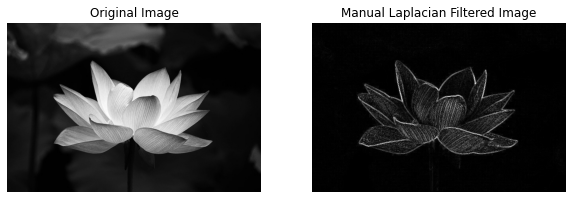

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_laplacian_filter_manual(image_path):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[1,  0, 1],
                                 [0, -4, 0],
                                 [1,  0, 1]])
   
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")

    # Get image dimensions
    img_height, img_width = image.shape
   
    # Initialize the output image
    filtered_image = np.zeros_like(image)

    # Apply the Laplacian kernel manually
    for i in range(1, img_height-1):
        for j in range(1, img_width-1):
            # Extract the region of interest
            region = image[i-1:i+2, j-1:j+2]
           
            # Perform element-wise multiplication and sum the results
            filtered_value = np.sum(region * laplacian_kernel)
           
            # Store the result in the output image
            filtered_image[i, j] = np.clip(np.abs(filtered_value), 0, 255)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Manual Laplacian Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Provide the path to your image file
image_path = 'lotus.jpg'
apply_laplacian_filter_manual(image_path)


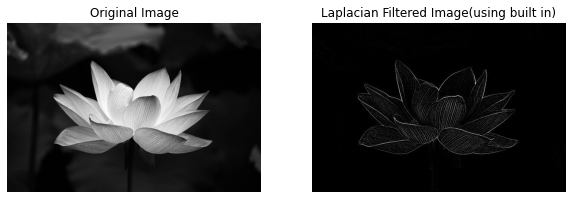

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_laplacian_filter(image_path):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[1,  0, 1],
                                 [0, -4, 0],
                                 [1,  0, 1]])

    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")

    # Apply the Laplacian filter using the custom kernel
    laplacian = cv2.filter2D(image, -1, laplacian_kernel)

    # Convert the result to a suitable type for display
    laplacian = np.uint8(np.absolute(laplacian))

    # Display the original and Laplacian filtered images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Laplacian Filtered Image(using built in)')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.show()

# Provide the path to your image file
image_path = 'lotus.jpg'
apply_custom_laplacian_filter(image_path)